<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf118cnnEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the second half of the assignment, where you'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits. 

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one. 

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon! 

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline
np.random.seed(1)

In [5]:
def load_signs_dataset():
    train_dataset = h5py.File('drive/MyDrive/datasets/signs/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('drive/MyDrive/datasets/signs//test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [8]:
x = np.array([[[0], [1], [2]]])
x=np.squeeze(x)
print(x,x.shape)

[0 1 2] (3,)


y = [2]
y = [2]
y = 2
y = 2


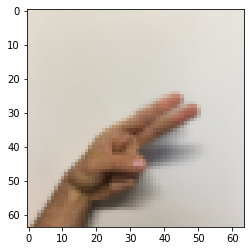

In [9]:
# Example of an image from the dataset
index = 2
plt.imshow(X_train_orig[index])
Y_train_transpose=Y_train_orig.T
print ("y = " + str(Y_train_orig[:,index]))
print ("y = " + str(Y_train_transpose[index]))
print ("y = " + str(np.squeeze(Y_train_orig[:,index])))
print ("y = " + str(np.squeeze(Y_train_transpose[index])))

In [11]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [12]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [13]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    # outputs = None
    
    # YOUR CODE STARTS HERE
    
    Z1 = tfl.Conv2D(8, 4, activation='linear', padding="same", strides=1)(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [14]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 4s 159ms/step - loss: 1.8096 - accuracy: 0.1648 - val_loss: 1.7889 - val_accuracy: 0.1833
Epoch 2/100
17/17 [==============================] - 2s 110ms/step - loss: 1.7890 - accuracy: 0.2250 - val_loss: 1.7848 - val_accuracy: 0.3167
Epoch 3/100
17/17 [==============================] - 2s 121ms/step - loss: 1.7871 - accuracy: 0.2509 - val_loss: 1.7829 - val_accuracy: 0.3167
Epoch 4/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7852 - accuracy: 0.2519 - val_loss: 1.7806 - val_accuracy: 0.3417
Epoch 5/100
17/17 [==============================] - 2s 109ms/step - loss: 1.7830 - accuracy: 0.2694 - val_loss: 1.7784 - val_accuracy: 0.3167
Epoch 6/100
17/17 [==============================] - 2s 110ms/step - loss: 1.7806 - accuracy: 0.2685 - val_loss: 1.7761 - val_accuracy: 0.2833
Epoch 7/100
17/17 [==============================] - 2s 110ms/step - loss: 1.7780 - accuracy: 0.2657 - val_loss: 1.7735 - val_accuracy: 0.3083

In [16]:
history.history

{'loss': [1.8095659017562866,
  1.7890193462371826,
  1.7870869636535645,
  1.7851775884628296,
  1.783014178276062,
  1.7805798053741455,
  1.7780299186706543,
  1.7748546600341797,
  1.7713979482650757,
  1.7673367261886597,
  1.7620470523834229,
  1.7555325031280518,
  1.7467544078826904,
  1.7357507944107056,
  1.7224987745285034,
  1.7047230005264282,
  1.6826826333999634,
  1.6554194688796997,
  1.622469186782837,
  1.5842034816741943,
  1.542140245437622,
  1.4981721639633179,
  1.4528406858444214,
  1.4082696437835693,
  1.3662878274917603,
  1.325538992881775,
  1.2875734567642212,
  1.252516508102417,
  1.2154933214187622,
  1.1836512088775635,
  1.1486530303955078,
  1.1186858415603638,
  1.0834497213363647,
  1.054604411125183,
  1.025311827659607,
  0.9960922598838806,
  0.9688625931739807,
  0.9418807625770569,
  0.9176754355430603,
  0.894639253616333,
  0.8723149299621582,
  0.8515873551368713,
  0.8321688175201416,
  0.8138509392738342,
  0.7963062524795532,
  0.779353

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

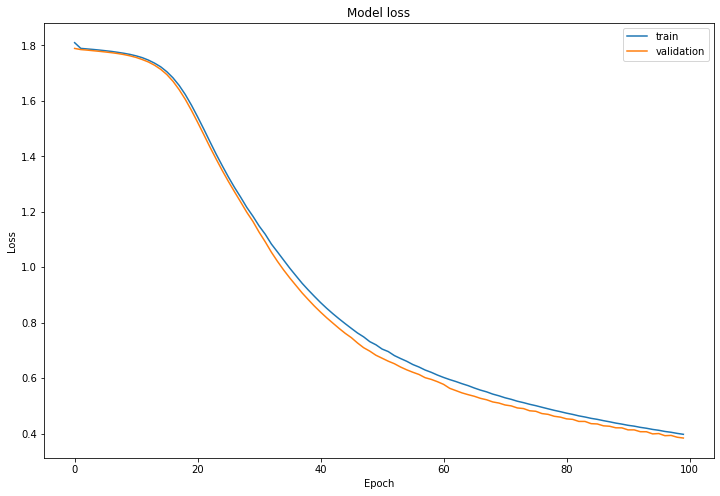

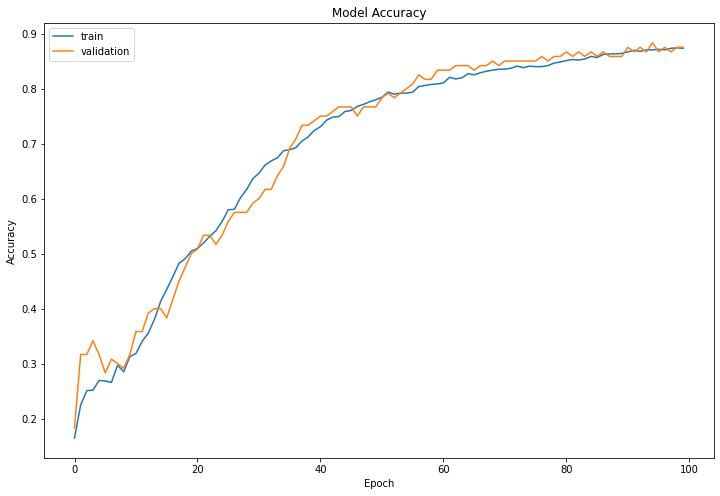

In [17]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')